In [10]:
import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection


import numpy as np

import pandas as pd

from timple.timedelta import strftimedelta

In [11]:

# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [12]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [13]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Monaco', 'Practice 1'

p1 = ff1.get_session(year, grand_prix, session)
p1.load() # This is new with Fastf1 v.2.2



core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [14]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Monaco', 'Practice 2'

p2 = ff1.get_session(year, grand_prix, session)
p2.load() # This is new with Fastf1 v.2.2


core           INFO 	Loading data for Monaco Grand Prix - Practice 2 [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


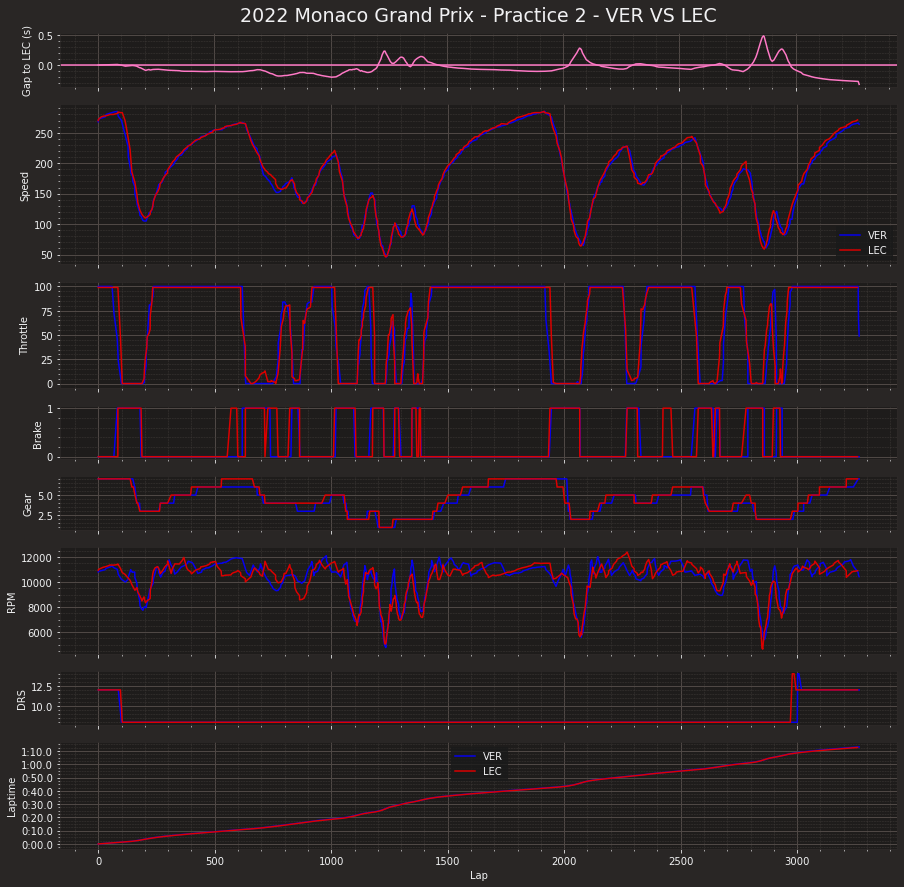

In [15]:
driver_1, driver_2 = 'VER', 'LEC'

# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = p2.laps.pick_driver(driver_1)
laps_driver_2 = p2.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



plot_size = [15, 15]
plot_title = f"{p2.event.year} {p2.event.EventName} - {p2.name} - {driver_1} VS {driver_2}"
#plot_ratios = [1, 3, 2, 1, 1, 2]
plot_ratios = [1, 3, 2, 1, 1, 2,1, 2]
plot_filename = plot_title.replace(" ", "") + ".png"




# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[7].set(ylabel='Laptime', xlabel='Lap')
ax[7].legend(loc="upper center")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()

In [16]:
p2.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
47,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,0.0,0.0,NaT,NaT,NaT,NaT,,0.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,0.0,0.0,NaT,NaT,NaT,NaT,,0.0


In [18]:
#laps_driver_1 = p2.laps.pick_driver(driver_1)

#sectorlaps = laps_driver_1[['Sector1Time','Sector2Time','Sector3Time']]

p2all_laps = p2.laps
p2tyre_stint = p2all_laps[['Driver','LapTime','LapNumber','Stint','Compound','TyreLife']].groupby(['Driver', 'Stint', 'Compound']).count().reset_index()
p2tyre_stint


driver_stints = p2tyre_stint.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])
driver_stints

,Driver,Stint,Compound,LapTime,StintLength,TyreLife
0,ALB,1,MEDIUM,8,9,9
51,NOR,1,MEDIUM,6,6,6
46,MSC,1,MEDIUM,9,9,9
70,RIC,1,MEDIUM,1,2,2
42,MAG,1,MEDIUM,8,8,8
...,...,...,...,...,...,...
57,NOR,5,MEDIUM,1,1,1
83,SAI,6,HARD,3,4,4
40,LEC,6,HARD,2,3,3
41,LEC,6,SOFT,1,1,1


In [19]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}


In [20]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Monaco', 'race'

race_monaco = ff1.get_session(year, grand_prix, session)
race_monaco.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.4]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track stat

In [21]:
race_monaco.event['Country']

'Monaco'

In [22]:
driver_stints = race_monaco.laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [23]:

driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [24]:
monaco2022 = race_monaco.laps
monaco2022.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [25]:

#monaco2022['Driver'].unique()
driver_stints

,Driver,Stint,Compound,StintLength
78,ZHO,2,WET,14
77,ZHO,2,INTERMEDIATE,5
57,STR,2,WET,1
21,LAT,2,WET,1
0,ALB,3,WET,18
...,...,...,...,...
47,PER,6,MEDIUM,34
29,LEC,6,HARD,34
16,GAS,6,HARD,34
38,NOR,7,MEDIUM,13


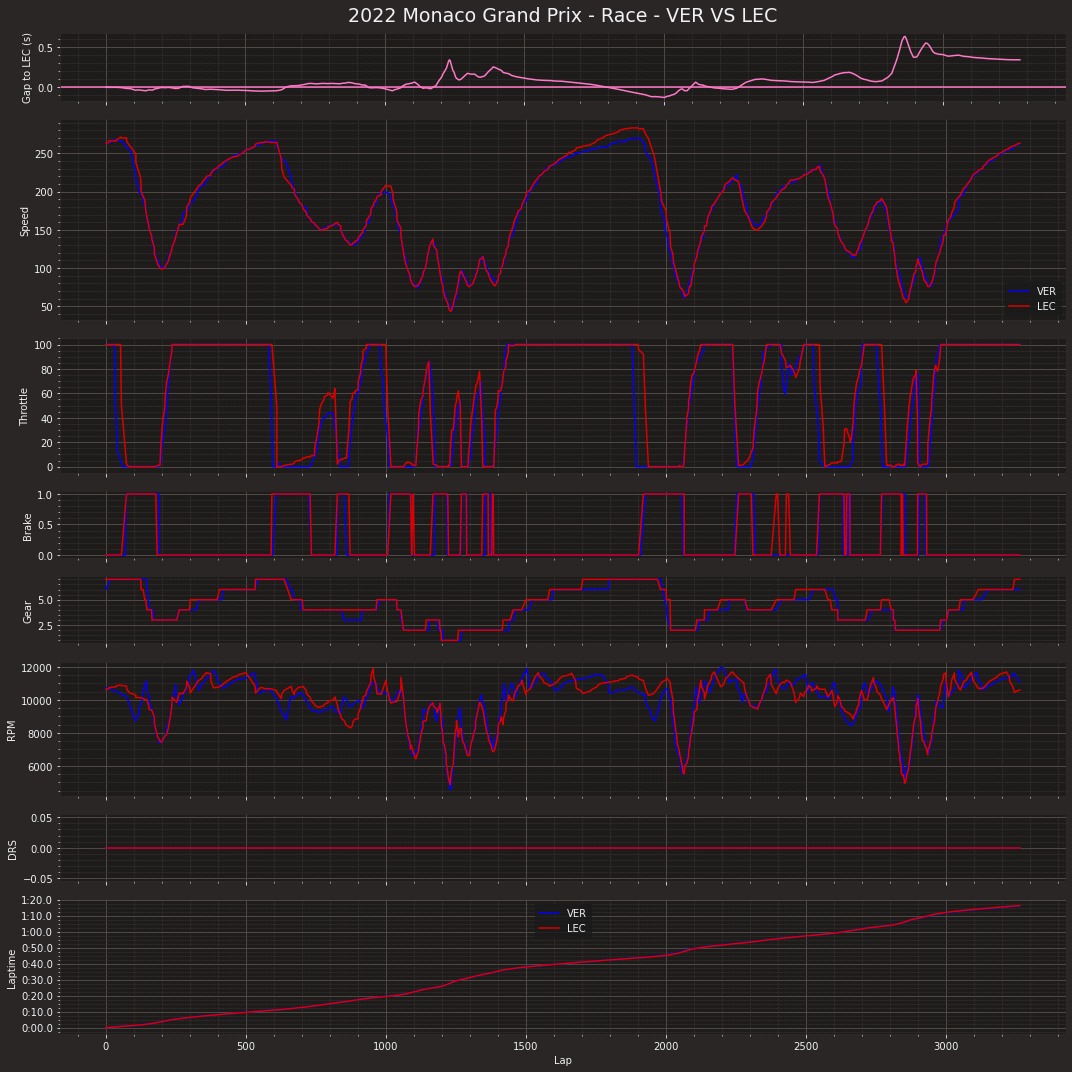

In [29]:
driver_1, driver_2 = 'VER', 'LEC'

# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = race_monaco.laps.pick_driver(driver_1)
laps_driver_2 = race_monaco.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



plot_size = [15, 15]
plot_title = f"{race_monaco.event.year} {race_monaco.event.EventName} - {race_monaco.name} - {driver_1} VS {driver_2}"
#plot_ratios = [1, 3, 2, 1, 1, 2]
plot_ratios = [1, 3, 2, 1, 1, 2,1, 2]
plot_filename = plot_title.replace(" ", "") + ".png"




# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[7].set(ylabel='Laptime', xlabel='Lap')
ax[7].legend(loc="upper center")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()

In [32]:
year = 2022
ses = 'R'
driver = 'VER'
colormap = plt.cm.plasma

year, grand_prix, session = 2022, 'Monaco', 'R'

session_monaco = ff1.get_session(year, grand_prix, session)
session_monaco.load() # This is new with Fastf1 v.2.2

lap = session_monaco.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']


In [34]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [35]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{grand_prix} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

AttributeError: 'NoneType' object has no attribute 'get_subplotspec'

<Figure size 864x486 with 2 Axes>

TypeError: unhashable type: 'numpy.ndarray'

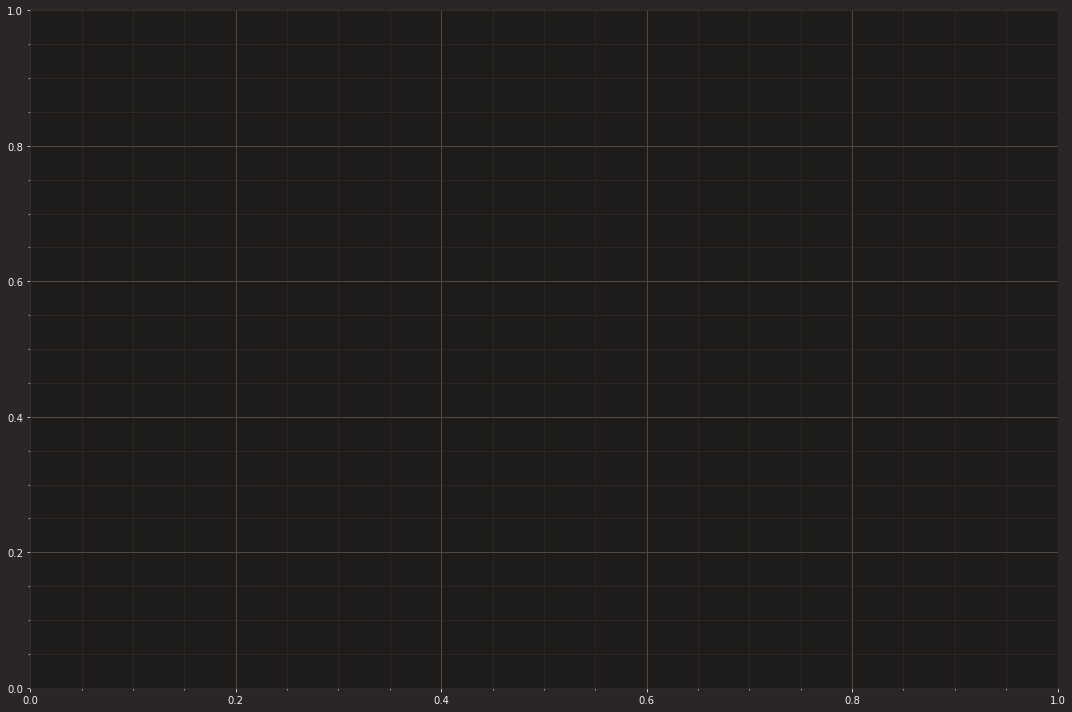

In [33]:
#

plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in [monaco2022['Driver'].unique() for driver in race_monaco.results]:
    stints = driver_stints.iloc[:,]

    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
            )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Set title
plt.title(f'Race strategy - {grand_prix} {year}')
        
# Set x-label
plt.xlabel('Lap')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.savefig('monaco_2022.png', dpi=300)

plt.show()